In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
#  loading the dataset to a pandas DataFrame
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
import plotly.express as px


class_counts = df['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Create a pie chart
fig = px.pie(class_counts, values='Count', names='Class', 
             title='Distribution of Class', 
             color_discrete_sequence=['skyblue', 'salmon'])
             



fig.show()



* as we see above, dataset is highly imbalanced.

In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* It seems there are no missing values in the dataset.

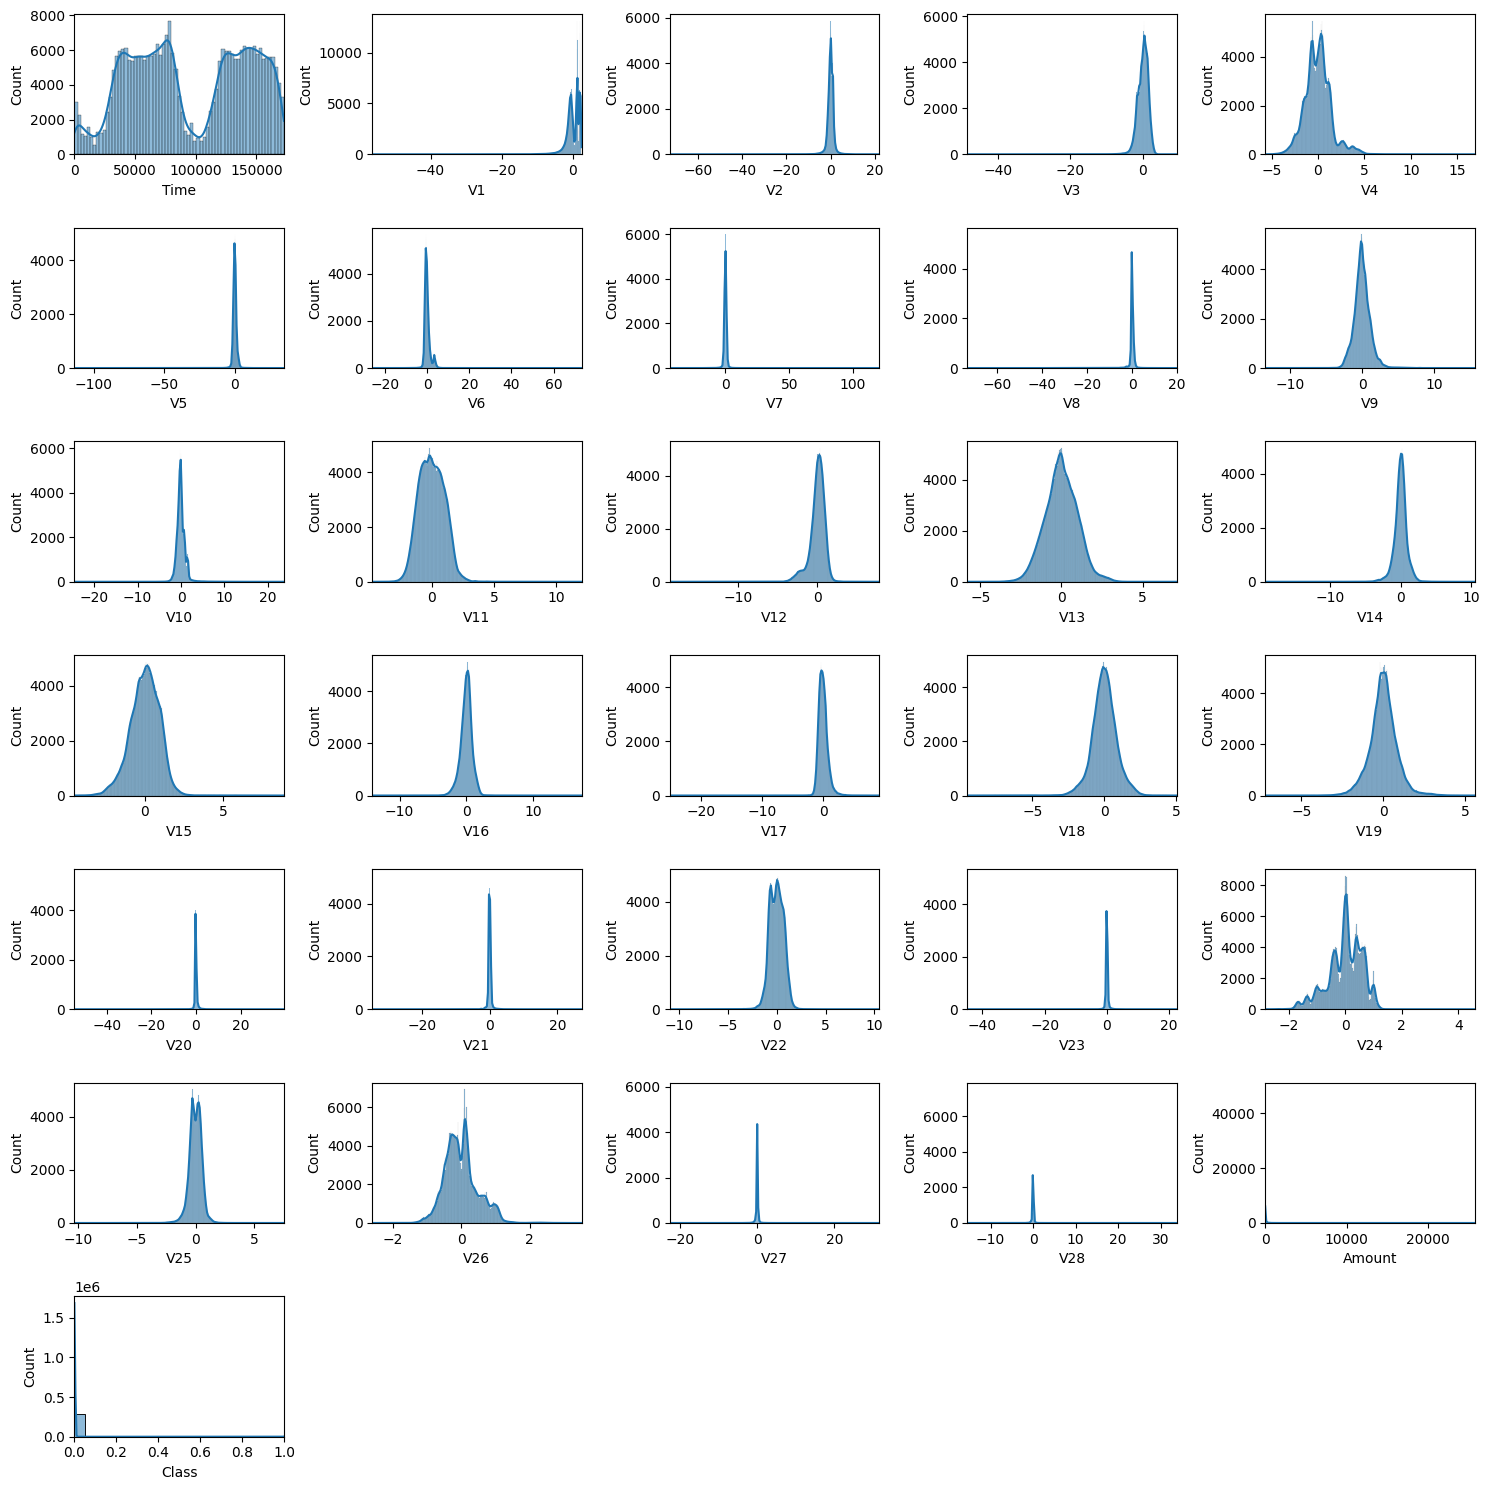

In [10]:
plt.figure(figsize=(15,15))

for i,col in enumerate(df.columns ,1):
    plt.subplot(7,5,i)
    sns.histplot(x=col, data=df, kde=True)
    plt.xlim(min(df[col]),max(df[col]))
    
plt.tight_layout() 
plt.show()    
    
    
    
    

# check duplicates


In [11]:
print(df.duplicated().sum())
print('Before droping duplicates values :', df.shape)

# drop duplicates
df = df.drop_duplicates()

print('After droping duplicates values :', df.shape)

1081
Before droping duplicates values : (284807, 31)
After droping duplicates values : (283726, 31)


# Scaling Data

* RobustScaler

In [12]:
from sklearn.preprocessing import RobustScaler

features = df.drop('Class', axis=1)
target = df['Class']

scaler = RobustScaler()

features_scaled = scaler.fit_transform(features)

df_scaled = pd.DataFrame(features_scaled , columns=features.columns)
df_scaled['Class'] = target.values

df_scaled.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.995290,-0.618360,-0.097622,1.229434,0.880878,-0.218773,0.632648,0.176974,0.143677,0.335739,...,0.026861,0.253199,-0.320939,0.032627,0.168017,-0.241512,0.816068,-0.246698,1.774718,0
1,-0.995290,0.524849,0.144367,-0.007034,0.295891,0.087159,0.165383,-0.106558,0.118241,-0.163546,...,-0.473668,-0.602596,0.363373,-0.479559,0.225835,0.314036,-0.064639,0.026214,-0.268530,0
2,-0.995279,-0.617709,-1.002505,0.831270,0.252882,-0.345402,1.780431,0.668400,0.422384,-1.178892,...,0.669336,0.714327,2.974843,-0.919547,-0.514733,-0.153300,-0.351138,-0.541896,4.959811,0
3,-0.995279,-0.442046,-0.177906,0.841592,-0.529031,0.033147,1.305834,0.175202,0.665139,-1.075980,...,-0.190254,-0.001308,-0.578965,-1.531860,0.944541,-0.299382,0.378404,0.382702,1.411487,0
4,-0.995267,-0.528050,0.581026,0.714142,0.267510,-0.271669,0.318307,0.491620,-0.547078,0.701771,...,0.048275,0.739164,-0.408139,0.126231,-0.332690,0.977848,1.346586,1.555108,0.667362,0


# Distribution after scaling

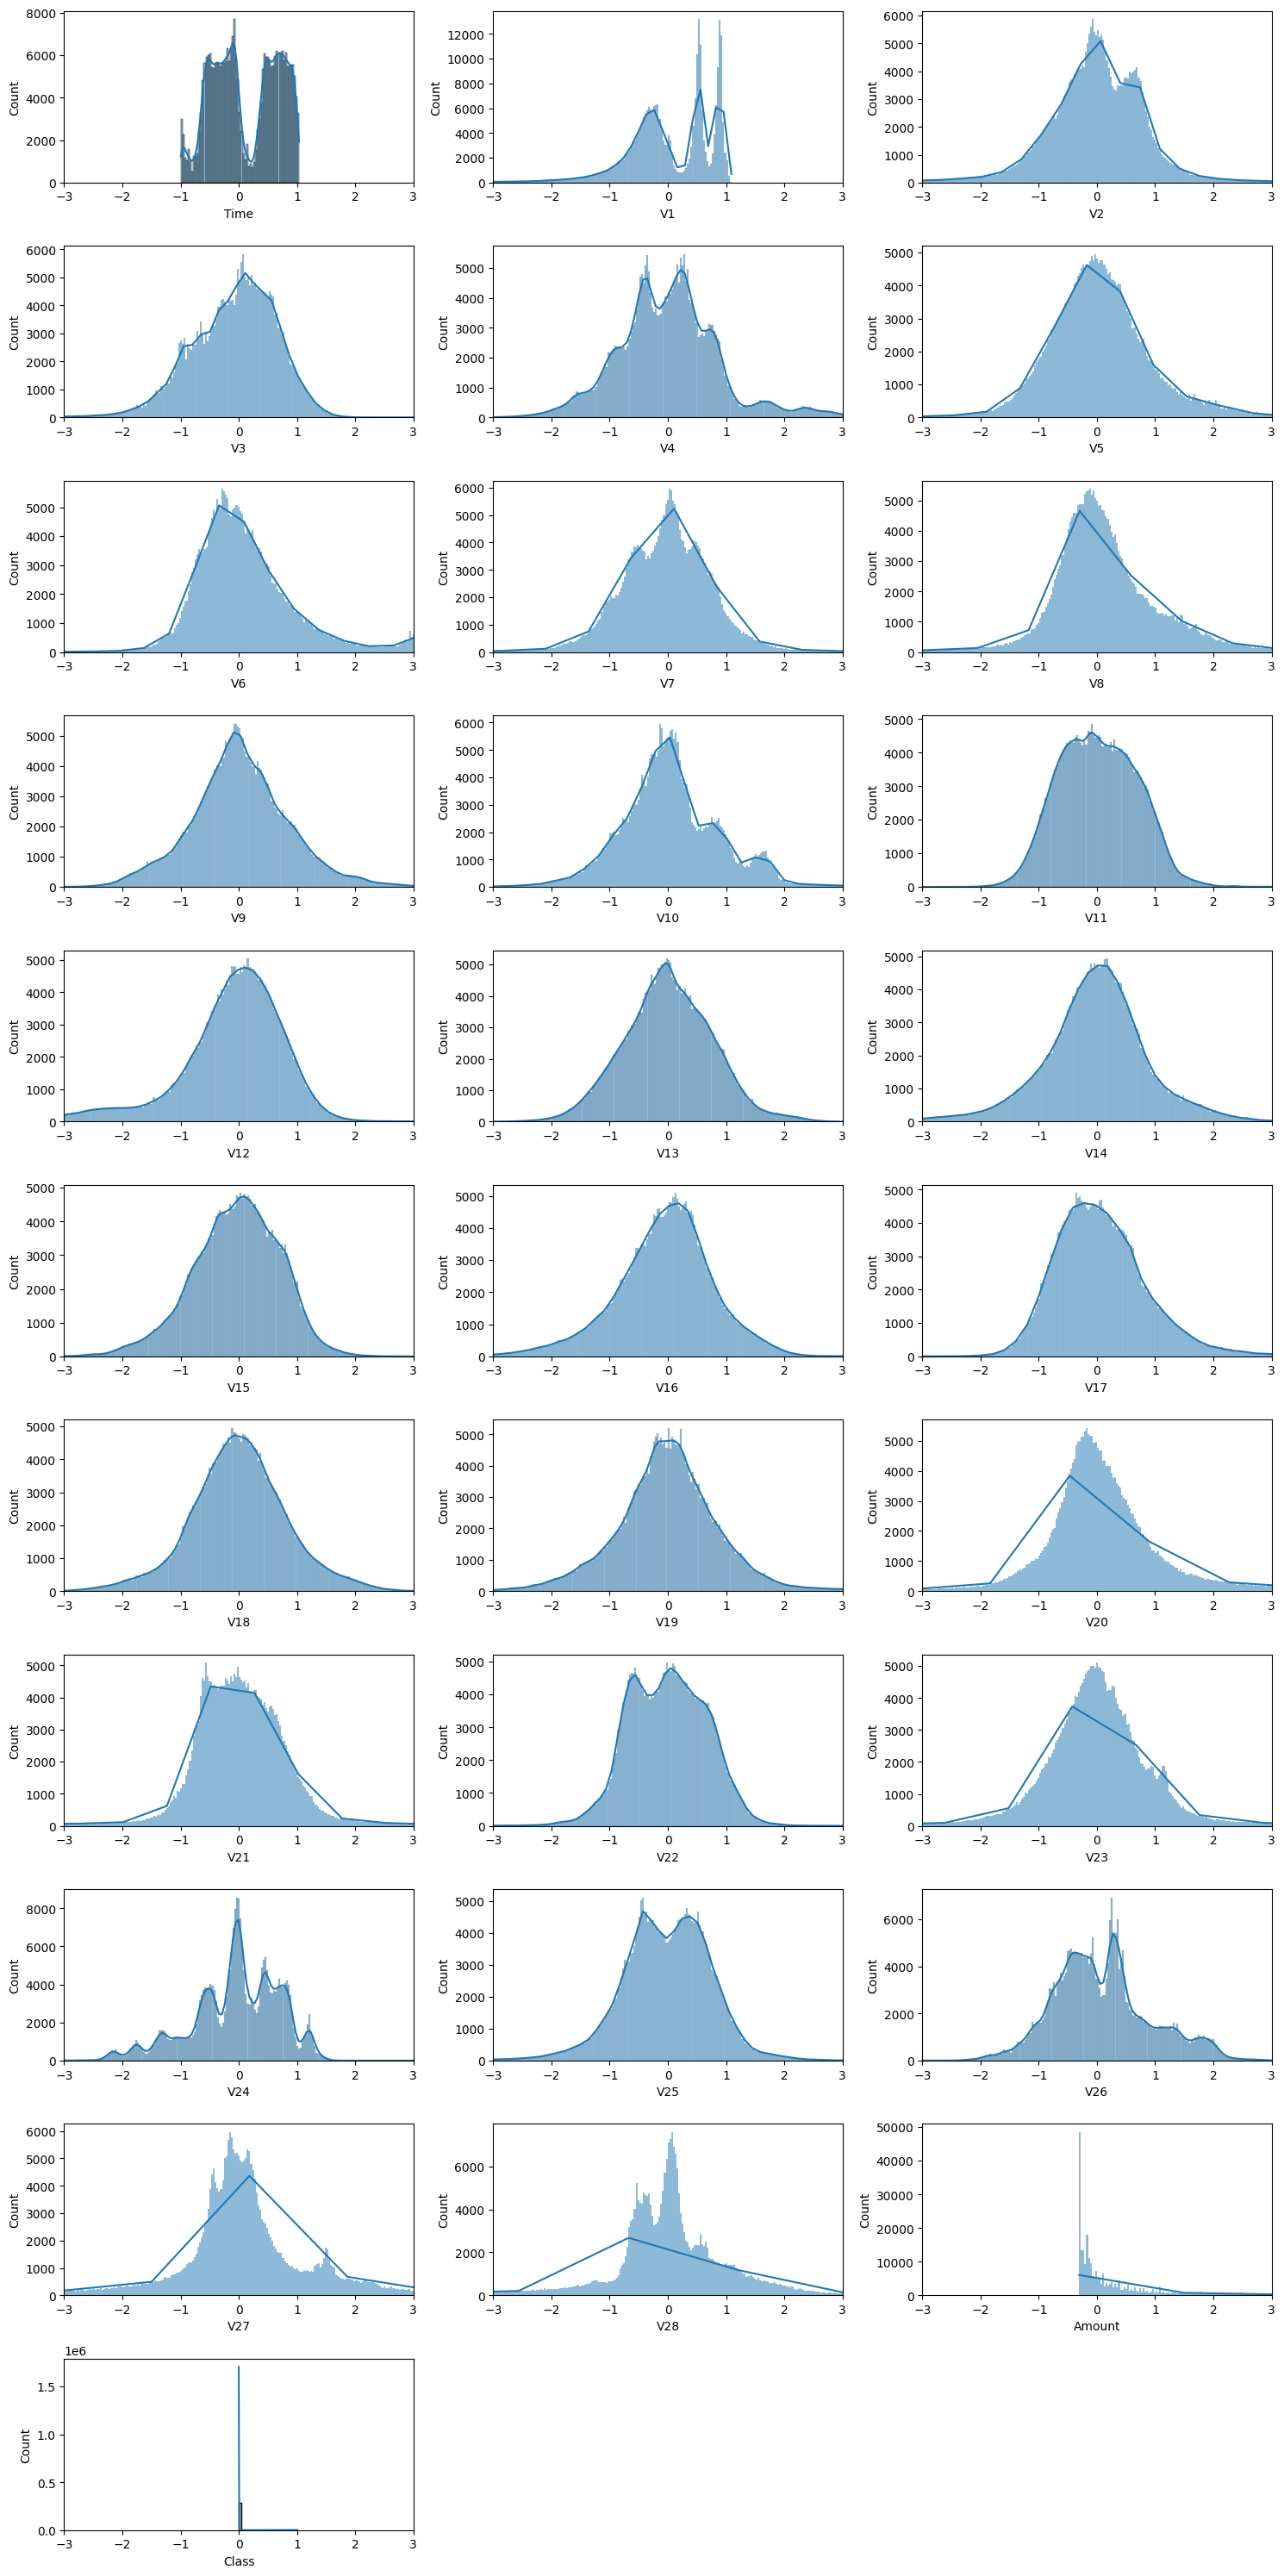

In [13]:
plt.figure(figsize=(15,30))

for i,col in enumerate(df_scaled.columns , 1):
    plt.subplot(11,3,i)
    sns.histplot(x=col, data=df_scaled , kde=True)
    plt.xlim(-3,3)
plt.tight_layout()

    
plt.show()  

* **The dataset is highly imbalanced, so I will use the SMOTE method to address this issue.**

In [14]:
# SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df_scaled.drop('Class', axis=1)
y = df_scaled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)

smote = SMOTE(sampling_strategy = 0.7 , random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

# create new dataframe with smote data
data = pd.DataFrame(X_train_smote , columns = X.columns)
data['Class'] = y_train_smote




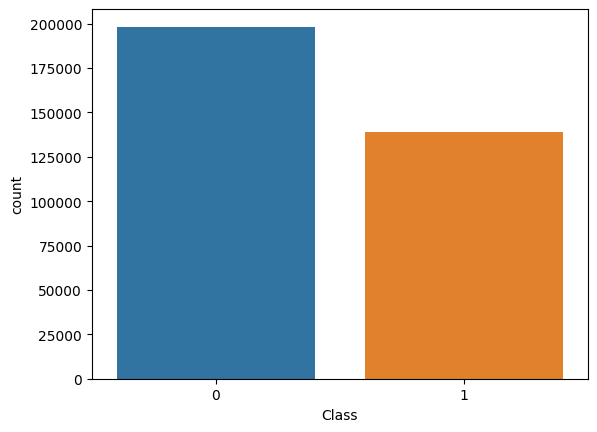

In [15]:
sns.countplot(x='Class', data=data)
plt.show()

In [16]:
import plotly.express as px


class_counts = data['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Create a pie chart
fig = px.pie(class_counts, values='Count', names='Class', 
             title='Distribution of Class', 
             color_discrete_sequence=['skyblue', 'salmon'])
             



fig.show()

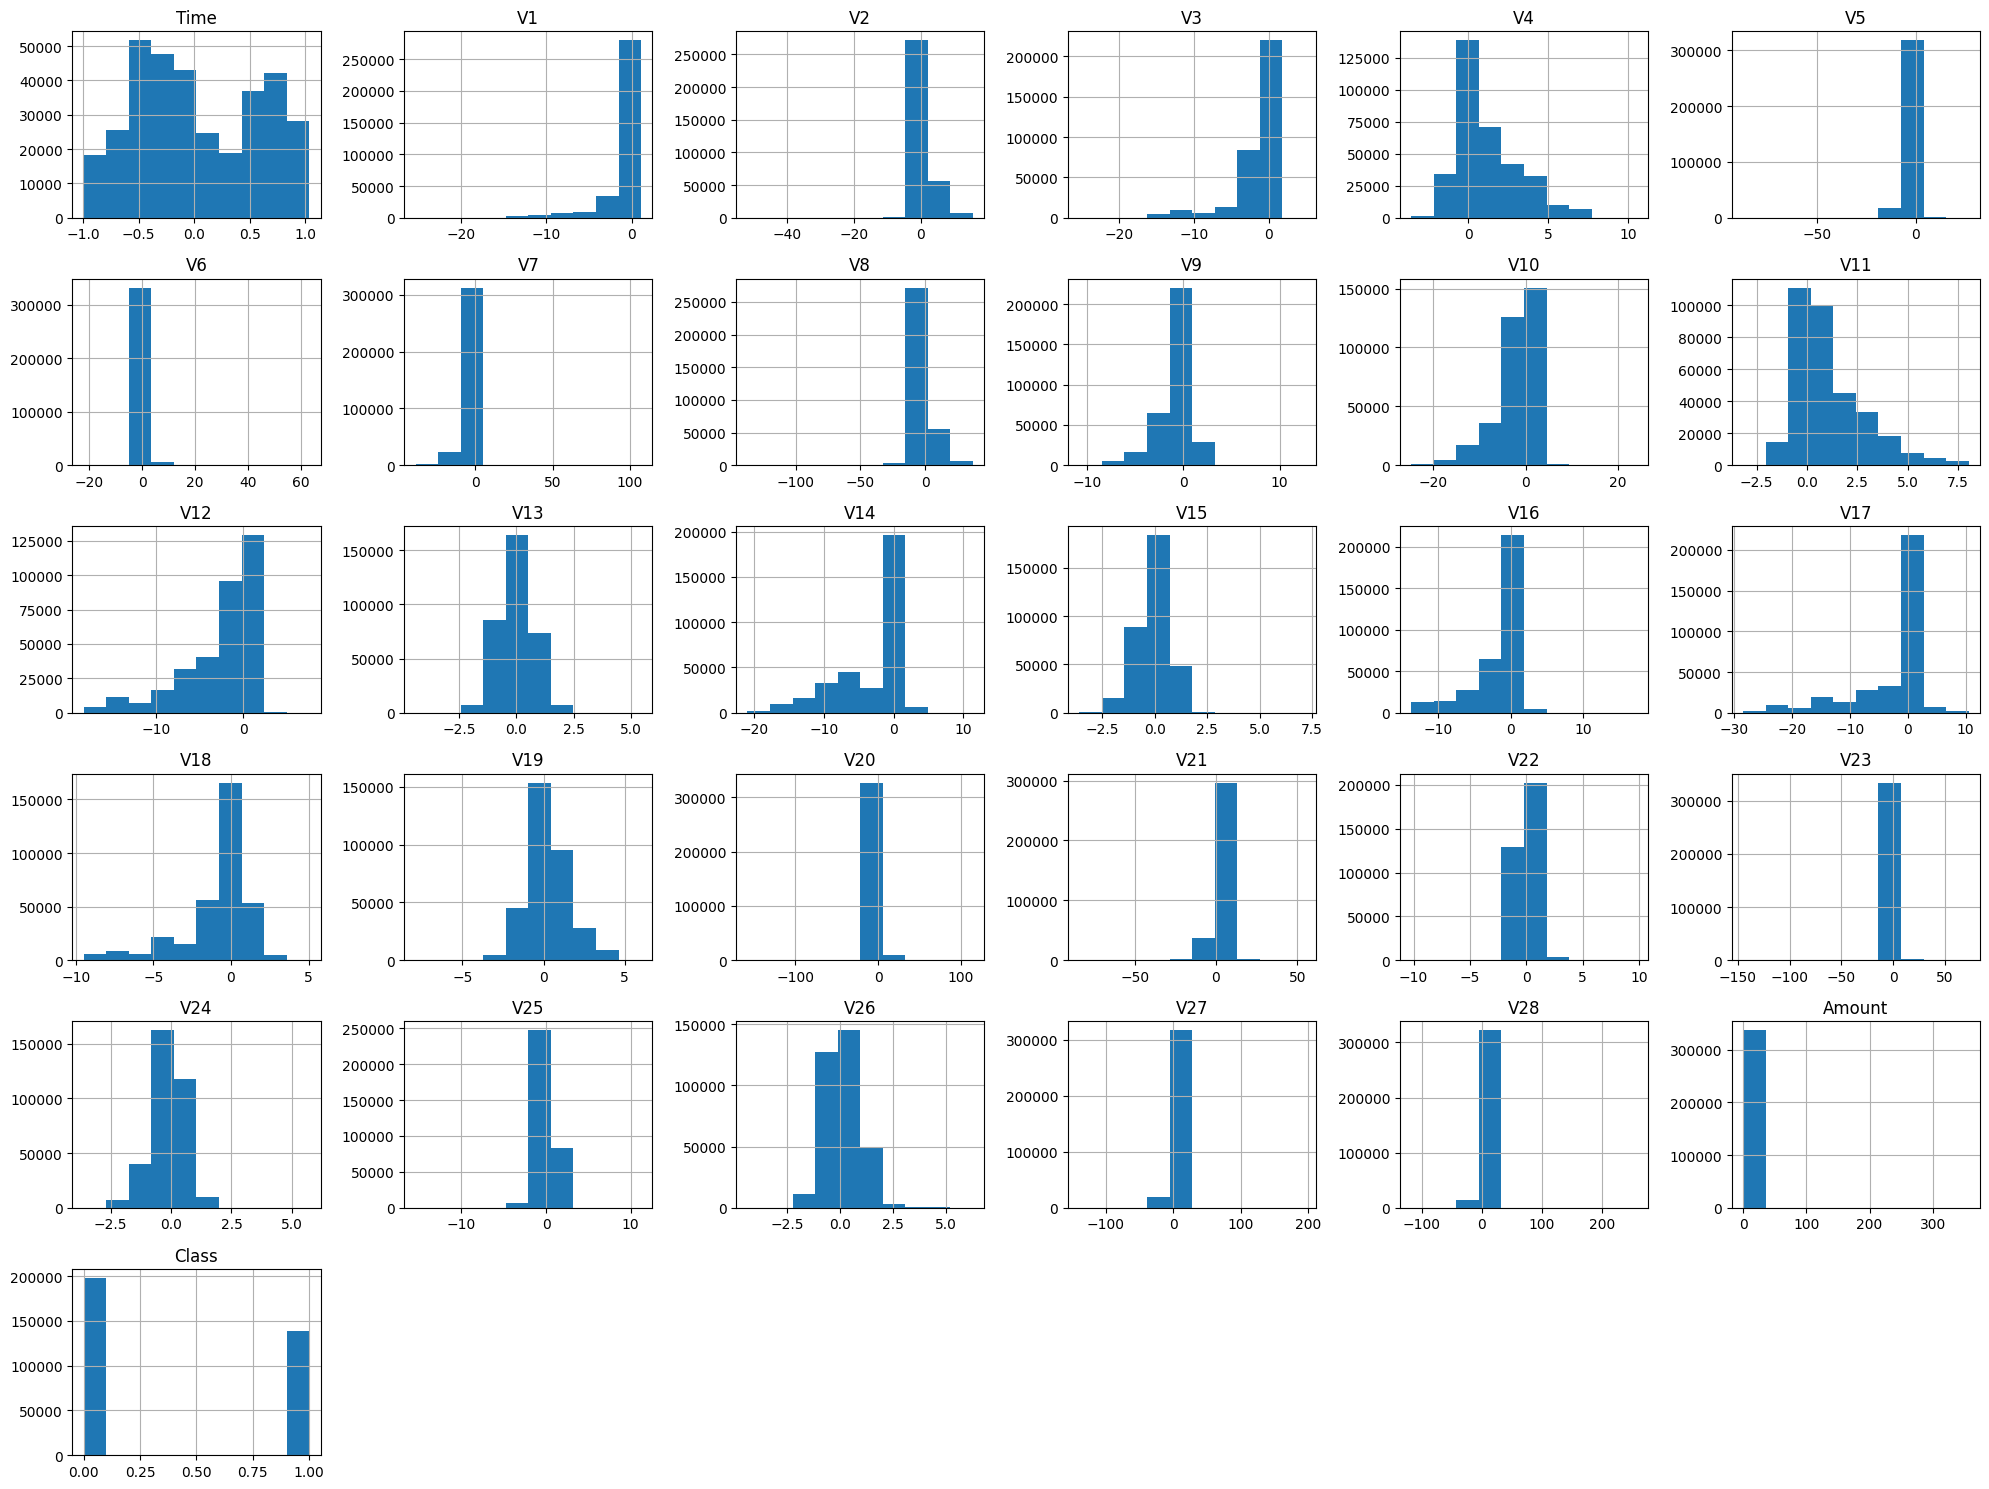

In [17]:
data.hist(figsize=(20,15), layout=(6,6))

plt.tight_layout()
plt.show()

# Split Data

In [18]:
X = data.drop('Class',axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Model Selection

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score, f1_score, recall_score, confusion_matrix,classification_report,ConfusionMatrixDisplay

In [20]:
lr = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
gb = GradientBoostingClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
nb = GaussianNB()

In [21]:
models = { 'Logistic Regression':lr, 'KNeighborsClassifier':knn, 'DecisionTreeClassifier':tree, 'RandomForestClassifier':rf,
          'GradientBoostingClassifier':gb, 'AdaBoostClassifier':ab , 'XGBClassifier':xgb , 'SVM':svc, 'GaussianNB':nb}

In [22]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print(f"Training Results for {name}")
    print(f"Accuracy : {accuracy_score(y_train,y_pred_train):.4f}")
    print(f"Precision : {precision_score(y_train,y_pred_train):.4f}")
    print(f"Recall : {recall_score(y_train,y_pred_train):.4f}")
    print(f"F1 score : {f1_score(y_train,y_pred_train):.4f}")
    
    print('\n')
    print(f"Testing Results for {name}")
    print(f"Accuracy : {accuracy_score(y_test,y_pred_test):.4f}")
    print(f"Precision : {precision_score(y_test,y_pred_test):.4f}")
    print(f"Recall : {recall_score(y_test,y_pred_test):.4f}")
    print(f"F1 score : {f1_score(y_test,y_pred_test):.4f}")
    print('---------------------------------------')

Training Results for Logistic Regression
Accuracy : 0.9534
Precision : 0.9753
Recall : 0.9097
F1 score : 0.9414


Testing Results for Logistic Regression
Accuracy : 0.9544
Precision : 0.9758
Recall : 0.9118
F1 score : 0.9428
---------------------------------------
Training Results for KNeighborsClassifier
Accuracy : 0.9989
Precision : 0.9974
Recall : 1.0000
F1 score : 0.9987


Testing Results for KNeighborsClassifier
Accuracy : 0.9984
Precision : 0.9961
Recall : 1.0000
F1 score : 0.9980
---------------------------------------
Training Results for DecisionTreeClassifier
Accuracy : 1.0000
Precision : 1.0000
Recall : 1.0000
F1 score : 1.0000


Testing Results for DecisionTreeClassifier
Accuracy : 0.9972
Precision : 0.9953
Recall : 0.9978
F1 score : 0.9966
---------------------------------------
Training Results for RandomForestClassifier
Accuracy : 1.0000
Precision : 1.0000
Recall : 1.0000
F1 score : 1.0000


Testing Results for RandomForestClassifier
Accuracy : 0.9999
Precision : 0.9997


# Model Evaluation

In [23]:
y_pred_final = models['GradientBoostingClassifier'].predict(X_test)

# classification report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     59452
           1       0.99      0.97      0.98     41666

    accuracy                           0.98    101118
   macro avg       0.98      0.98      0.98    101118
weighted avg       0.98      0.98      0.98    101118



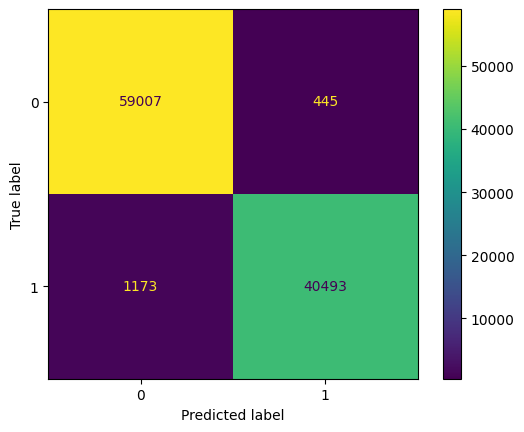

In [24]:
# connfusion matrix
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_final, values_format='d')
plt.show()

# ROC Curve

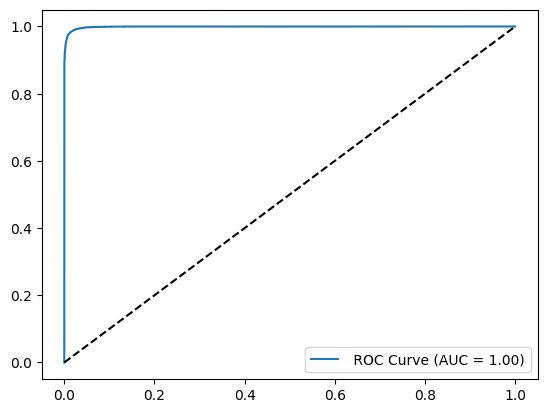

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, RocCurveDisplay

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train,y_train)

y_prob = gb.predict_proba(X_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,y_prob)

auc_score = roc_auc_score(y_test,y_prob)

plt.plot(fpr, tpr, label=f" ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.legend(loc='lower right')
plt.show()

# Model Deployment

In [26]:
import pickle

with open('Final_Model.pkl','wb') as file:
    pickle.dump(models['GradientBoostingClassifier'], file)

In [27]:
#load model
with open('Final_Model.pkl','rb') as file:
    loaded_model = pickle.load(file)

In [28]:
loaded_model

GradientBoostingClassifier(random_state=42)